# **IRIS FLOWER CLASSIFICATION**

## *step* *0* : *importig* *libraries*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## *step* *1* : *load* *the* *dataset*

In [4]:
df=pd.read_csv("/content/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## *step* *2* : *explore* *the* *dataset*

In [9]:
print("shape of dataset:",df.shape)
print("\ndata info:")
print(df.info())
print("\statistical summary:")
print(df.describe())
print("\ntarget values:")
print(df['Species'].value_counts())

shape of dataset: (150, 6)

data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
\statistical summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000    

## *step* *3* : *visualize* *the* *dataset*

# # violin plot

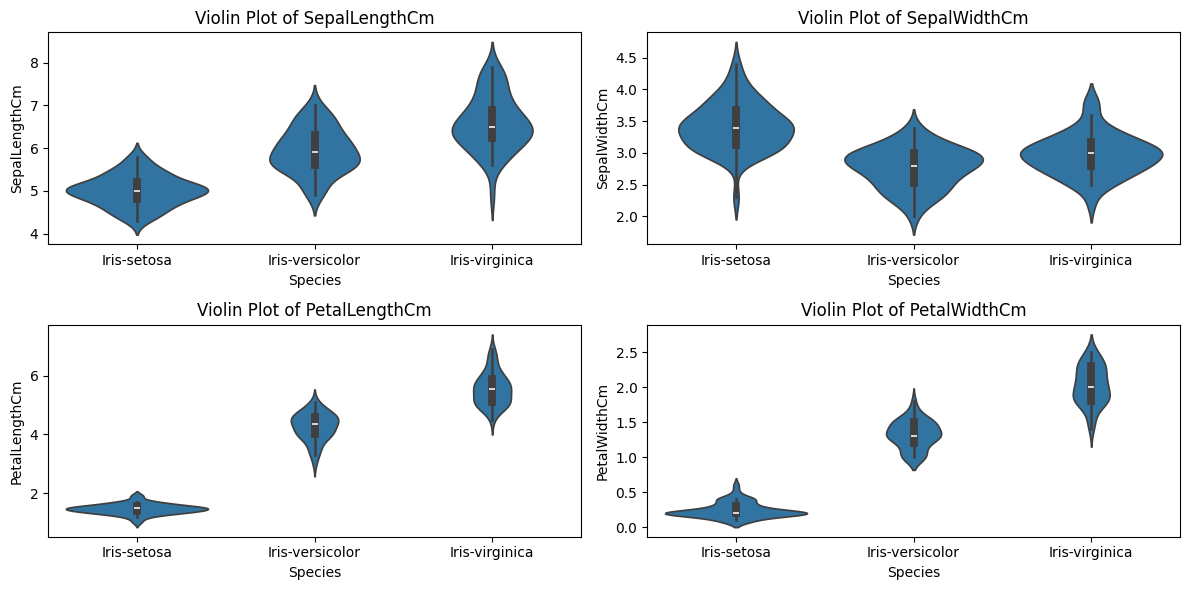

In [11]:
plt.figure(figsize=(12,6))
for i, column in enumerate(df.columns.drop(['Id', 'Species']),1):
  plt.subplot(2,2,i)
  sns.violinplot(x='Species',y=column,data=df)
  plt.title(f"Violin Plot of {column}")
plt.tight_layout()
plt.show()



# # swarm plot





/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


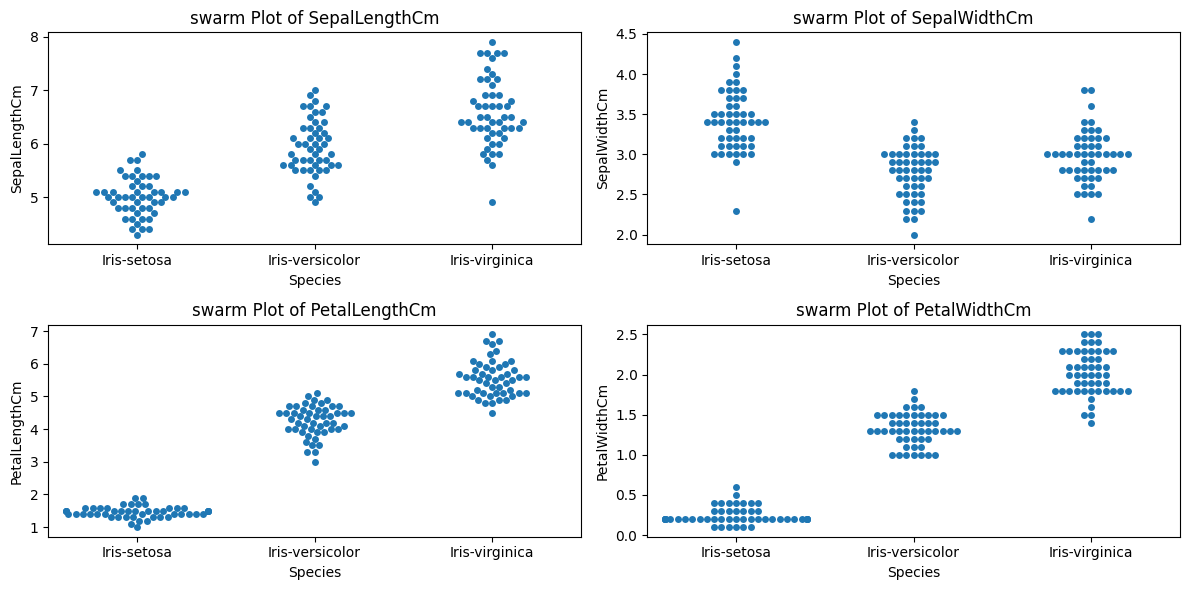

In [13]:
plt.figure(figsize=(12,6))
for i,column in enumerate(df.columns.drop(['Id', 'Species']),1):
  plt.subplot(2,2,i)
  sns.swarmplot(x='Species',y=column,data=df)
  plt.title(f"swarm Plot of {column}")
plt.tight_layout()
plt.show()

# # histogram

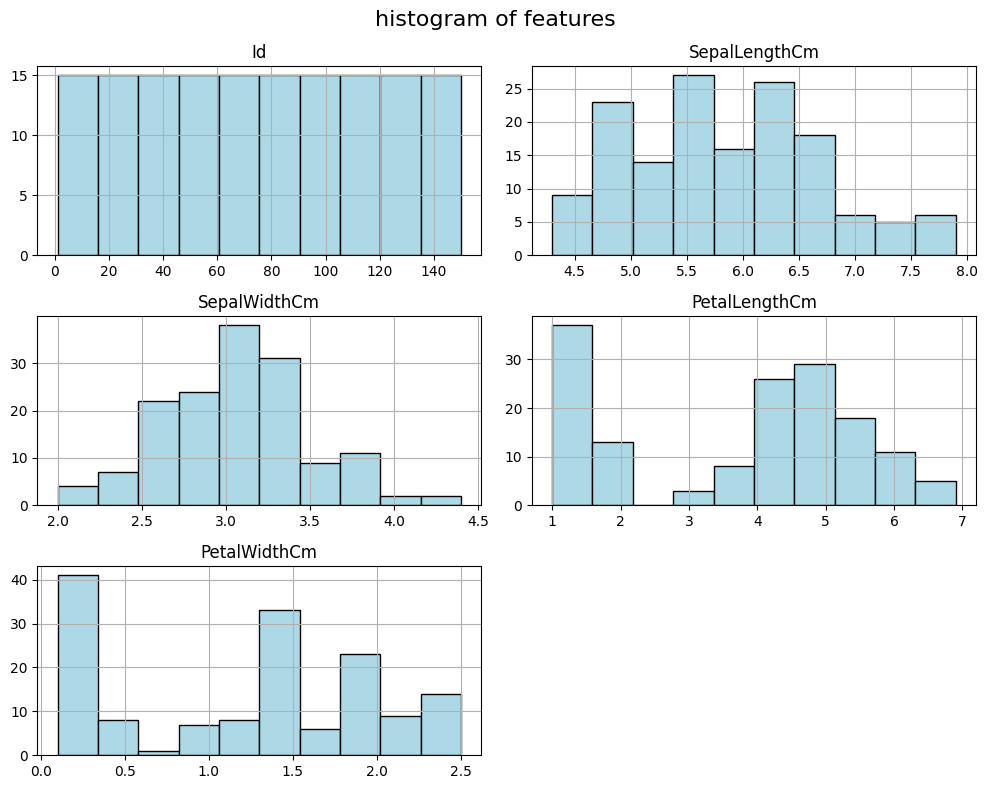

In [15]:
df.hist(figsize=(10,8),color='lightblue',edgecolor='black')
plt.suptitle("histogram of features",fontsize=16)
plt.tight_layout()
plt.show()

# # scatter plot

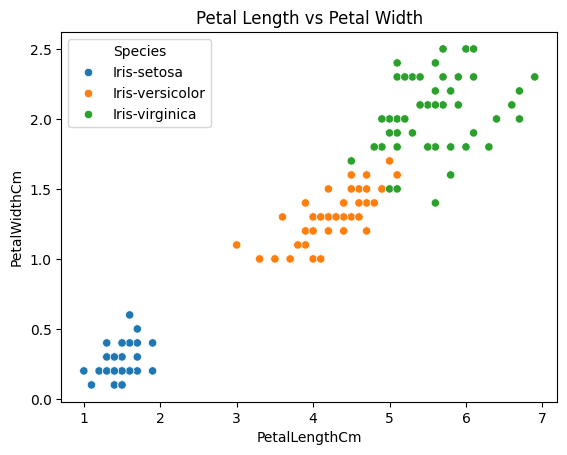

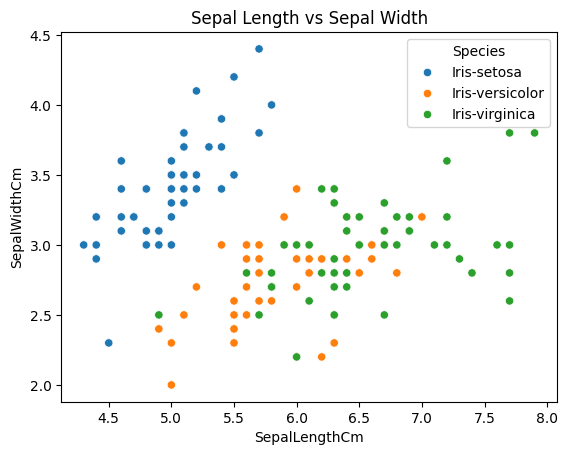

In [17]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)
plt.title("Petal Length vs Petal Width")
plt.show()
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.title("Sepal Length vs Sepal Width")
plt.show()

# # boxplot

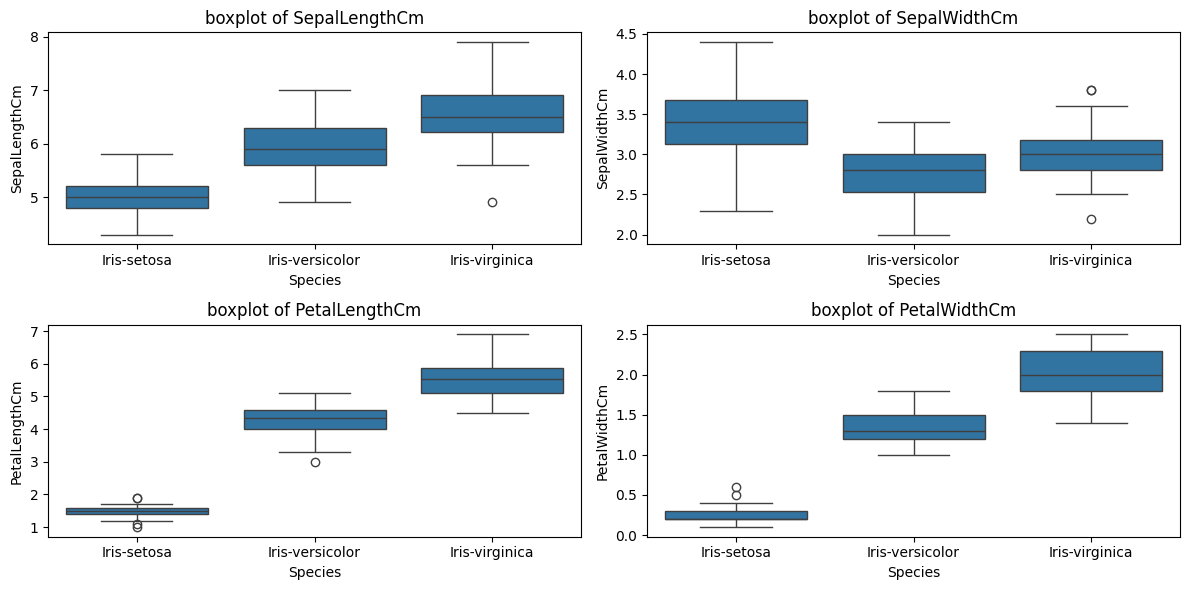

In [19]:
plt.figure(figsize=(12,6))
for i,column in enumerate(df.columns.drop(['Id', 'Species']),1):
  plt.subplot(2,2,i)
  sns.boxplot(x='Species',y=column,data=df)
  plt.title(f"boxplot of {column}")
plt.tight_layout()
plt.show()

# # pairplot

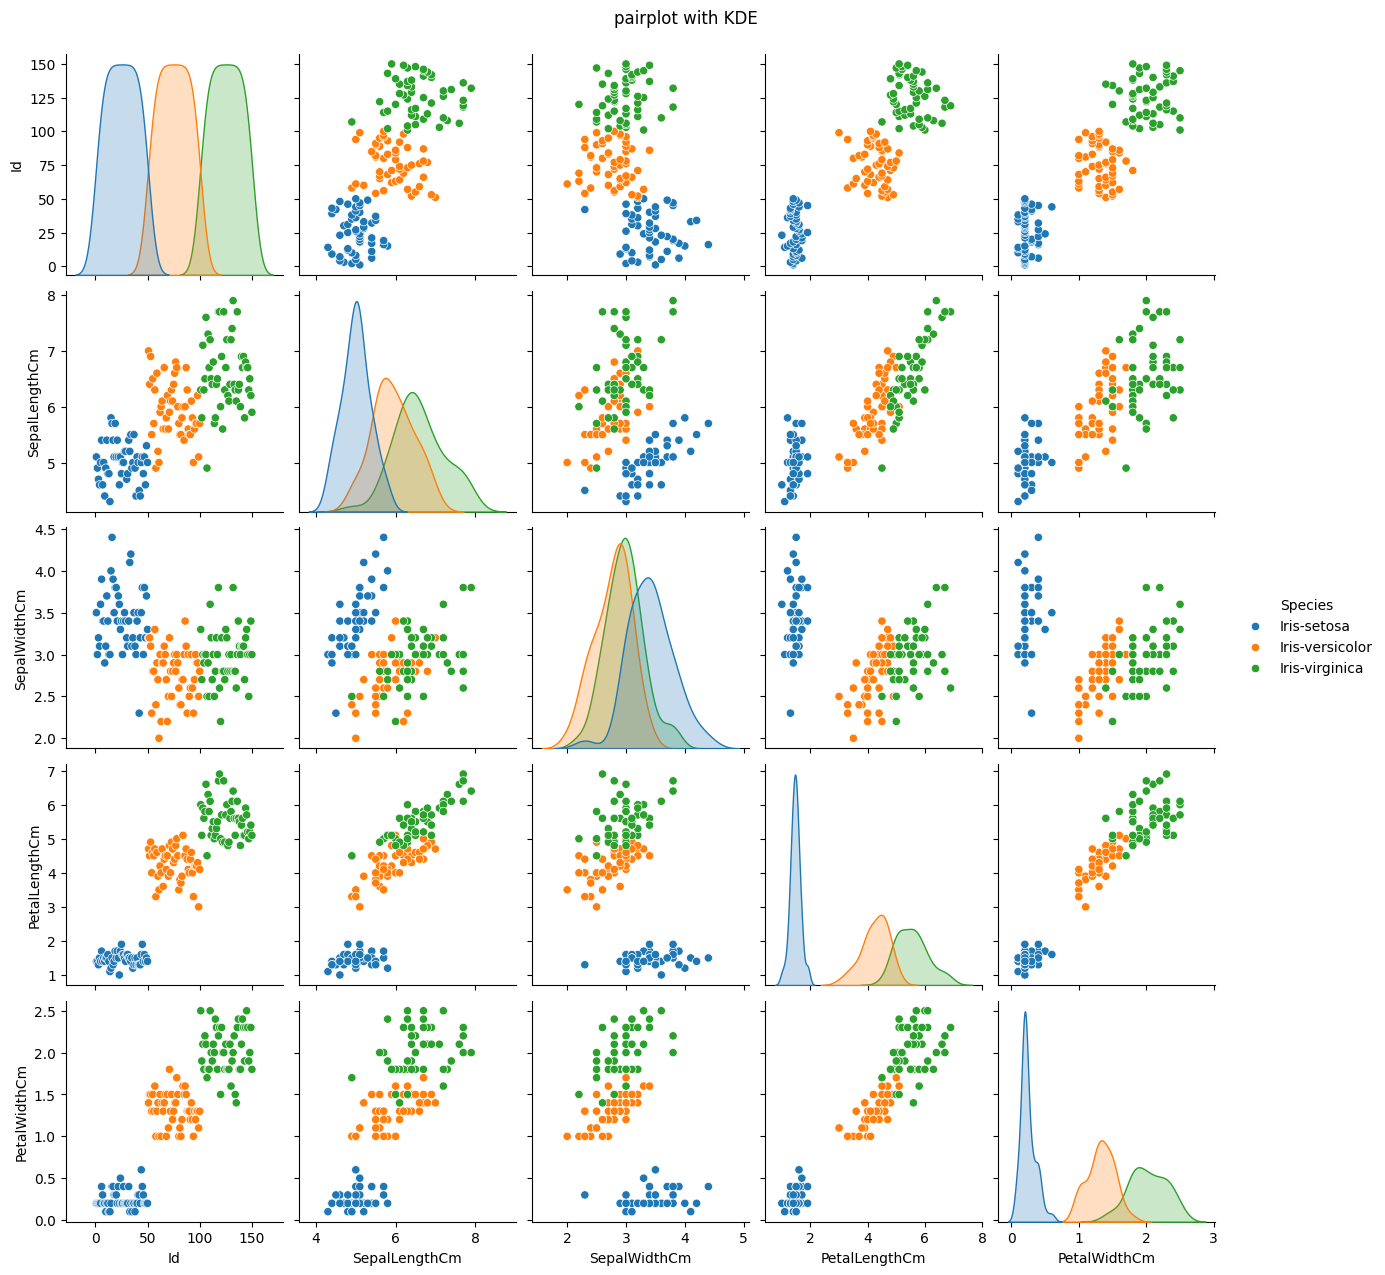

In [21]:
sns.pairplot(df,hue='Species',diag_kind='kde')
plt.suptitle("pairplot with KDE",y=1.02)
plt.show()

## *step* *4* : *prepeare* *the* *data*

In [28]:
x=df.drop(['Species', 'Id'],axis=1)
y=df['Species']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## *step* *5* : *train machine learning models*

# # logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

# # K-Nearest Neighbors (KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

# # decision tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

# # random forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

# # Support Vector Machine

In [40]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)

## *step 6 : evaluate the models*

In [41]:
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
models=['Logistic Regression','KNN','Decision Tree','Random Forest','SVM']
scores=[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_svm)]
for model, score in zip(models, scores):
  print(f"{model}:{score:2f}")

Logistic Regression:1.000000
KNN:1.000000
Decision Tree:1.000000
Random Forest:1.000000
SVM:1.000000


## *step 7 : accuracy comparison*

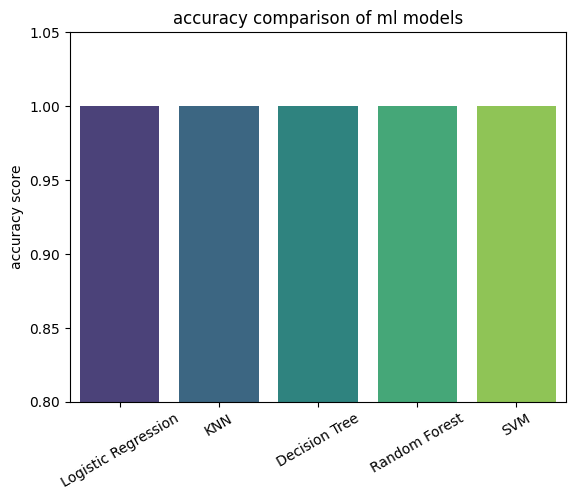

In [43]:
sns.barplot(x=models, y= scores, palette="viridis")
plt.title("accuracy comparison of ml models")
plt.xticks(rotation=30)
plt.ylabel("accuracy score")
plt.ylim(0.8, 1.05)
plt.show()

## *step 8: predict new flower*

In [45]:
new_flower=pd.DataFrame([[5.9, 3.0, 5.1, 1.8]], columns=x.columns)
new_flower_scaled=scaler.transform(new_flower)
predicted_species=rf.predict(new_flower_scaled)
print("predicted species:",predicted_species[0])

predicted species: Iris-virginica
